In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import strax
import straxen
import wfsim

In [2]:
straxen.contexts.xnt_common_config['gain_model'] = ('to_pe_constant', '1500V_20200614')
st = strax.Context(
            storage=strax.DataDirectory('/Users/mzks/xenon/tutor3/strax_data'),
            register=wfsim.RawRecordsFromFaxOpticalnV,
            # register=wfsim.RawRecordsFromFaxNT,
            config=dict(detector='XENONnT',
                        fax_config='/Users/mzks/xenon/tutor3/fax_config_nt.json',
                        optical=True,
                        nv=True,
                        **straxen.contexts.xnt_common_config,
                        ),
            **straxen.contexts.common_opts)

In [15]:
run_id = '1'
st.set_config(dict(nchunk=1, event_rate=5, chunk_size=10,
                       fax_file='/Users/mzks/xenon/tutor3/output0500.root',
                       nSort_path='/Users/mzks/xenon/tutor3/output0500_Sort.root'
                       ))

In [4]:
raw_records_nv = st.get_array(run_id, 'raw_records_nv')

/usr/local/lib/python3.7/site-packages/strax-0.12.0-py3.7.egg/strax/context.py:445: UserWarning: Option nSort_path not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
|██████████| 100.00 % [00:00<00:00], Rate last Chunk: 0.97 s/chunk, #chunks processed: 1


In [8]:
raw_records_nv.dtype

dtype([(('Start time since unix epoch [ns]', 'time'), '<i8'), (('Length of the interval in samples', 'length'), '<i4'), (('Width of one sample [ns]', 'dt'), '<i2'), (('Channel/PMT number', 'channel'), '<i2'), (('Length of pulse to which the record belongs (without zero-padding)', 'pulse_length'), '<i4'), (('Fragment number in the pulse', 'record_i'), '<i2'), (('Integral in ADC counts x samples', 'area'), '<i4'), (('Level of data reduction applied (strax.ReductionLevel enum)', 'reduction_level'), 'u1'), (('Baseline in ADC counts. data = int(baseline) - data_orig', 'baseline'), '<f4'), (('Baseline RMS in ADC counts. data = baseline - data_orig', 'baseline_rms'), '<f4'), (('Multiply data by 2**(this number). Baseline is unaffected.', 'amplitude_bit_shift'), '<i2'), (('Waveform data in raw counts above integer part of baseline', 'data'), '<i2', (110,))])

In [ ]:
dtype([(('Start time since unix epoch [ns]', 'time'), '<i8'),
       (('Length of the interval in samples', 'length'), '<i4'), 
       (('Width of one sample [ns]', 'dt'), '<i2'), 
       (('Channel/PMT number', 'channel'), '<i2'), 
       (('Length of pulse to which the record belongs (without zero-padding)', 'pulse_length'), '<i4'),
       (('Fragment number in the pulse', 'record_i'), '<i2'), (('Integral in ADC counts x samples', 'area'), '<i4'),
       (('Level of data reduction applied (strax.ReductionLevel enum)', 'reduction_level'), 'u1'),
       (('Baseline in ADC counts. data = int(baseline) - data_orig', 'baseline'), '<f4'), 
       (('Baseline RMS in ADC counts. data = baseline - data_orig', 'baseline_rms'), '<f4'),
       (('Multiply data by 2**(this number). Baseline is unaffected.', 'amplitude_bit_shift'), '<i2'),
       (('Waveform data in raw counts above integer part of baseline', 'data'), '<i2', (110,))])

In [7]:
raw_records_nv[0]

(9999540, 107, 10, 78, 107, 0, 1711636, 0, 0., 0., 0, [16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 15951, 15940, 15976, 15988, 15926, 15957, 15981, 15988, 15991, 15992, 15993, 15993, 15994, 15995, 15995, 15995, 15996, 15996, 15996, 15997, 15999, 15999, 15999, 15999, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000,     0,     0,     0])

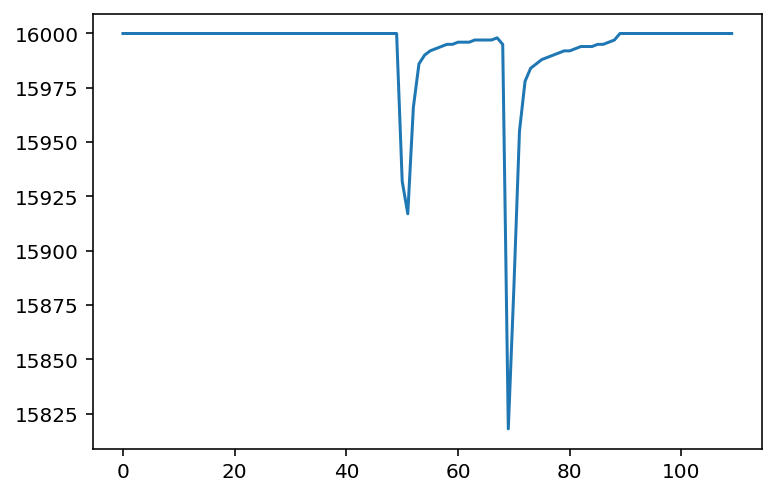

In [14]:
record = raw_records_nv[1]
plt.plot(record['data'][0:record['length']])